Sepsis is a life-threatening medical condition that occurs when the body's response to an infection goes awry, leading to systemic inflammation, organ dysfunction, and potentially death. Analyzing and modeling sepsis is of paramount importance in healthcare, as early detection and intervention can significantly improve patient outcomes.




## Columns description of the data
 These columns contain various measurements, demographic information, and indicators related to the presence of sepsis.


1. ID : Unique number to represent patient ID
2. PRG : Plasma glucose
3. PL : Blood Work Result-1 (mu U/ml)
4. PR : Blood Pressure (mm Hg)
5. SK : Blood Work Result-2 (mm)
6. TS : Blood Work Result-3 (mu U/ml)
7. M11 : Body mass index (weight in kg/(height in m)^2
8. BD2 : Blood Work Result-4 (mu U/ml)
9. Age : Patients age (years)

10. Insurance : If a patient holds a valid insurance card
11. Sepssis : Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise


## **Business Questions**

1. What are the contributing factors to the onset of sepsis in the provided dataset?

2. Is there a significant disparity in the age distribution between patients who have tested positive for sepsis and those who have not?

3. Can we discern any patterns or connections between the status of insurance coverage and the occurrence of sepsis?

4. Are there any noteworthy distinctions in the prevalence of sepsis cases based on specific medical parameter levels?

5. How are various medical measurements (e.g., pregnancy, blood pressure, glucose levels) correlated with the presence of sepsis?

6. Is there any link between the presence of sepsis and specific demographic factors like gender or age?

7. Is it possible to investigate the association between sepsis and other variables such as BMI, diabetes pedigree function, or the length of hospital stay?

**Hypothesis:**

**Null Hypothesis (H0):**

- The features PRG, PL, PR, SK, TS, M11, BD2, Age, and Insurance do not have predictive significance for the presence or absence of Sepsis disease.

**Alternative Hypothesis (H1):**

- The features PRG, PL, PR, SK, TS, M11, BD2, Age, and Insurance do have predictive significance for the presence or absence of Sepsis disease.

### IMPORTATION OF LIBRARIES & PACKAGES 

In [37]:
#data handling 
import pandas as pd
import numpy as np

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


### DATA LOADING

In [38]:
#Loading the train and Eval dataset 
train_df = pd.read_csv('data\Paitients_Files_Train.csv')
test_df = pd.read_csv('data\Paitients_Files_Test.csv')

### EXPLORATORY DATA ANALYSIS 

In [39]:
print(train_df.head())
print(test_df.head())

          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0


In [40]:
#renames colummns with actual definition headers 
new_column_names = {'PRG':'Plasma_Glucose',
               'PL': 'Blood_Work_Result1',
               'PR': 'Blood_Pressure',
               'SK': 'Blood_Work_Result2',
               'TS': 'Blood_Work_Result3',
               'M11': 'Body_mass_index',
               'BD2': 'Blood_Work_Result4'
}

train_df.rename(columns = new_column_names, inplace = True)
test_df.rename (columns = new_column_names, inplace = True)

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  599 non-null    object 
 1   Plasma_Glucose      599 non-null    int64  
 2   Blood_Work_Result1  599 non-null    int64  
 3   Blood_Pressure      599 non-null    int64  
 4   Blood_Work_Result2  599 non-null    int64  
 5   Blood_Work_Result3  599 non-null    int64  
 6   Body_mass_index     599 non-null    float64
 7   Blood_Work_Result4  599 non-null    float64
 8   Age                 599 non-null    int64  
 9   Insurance           599 non-null    int64  
 10  Sepssis             599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [42]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma_Glucose,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
Blood_Work_Result1,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
Blood_Pressure,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
Blood_Work_Result2,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
Blood_Work_Result3,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
Body_mass_index,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
Blood_Work_Result4,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


### CHECKING FOR MISSING VALUES 

In [43]:
train_df.isna().sum()

ID                    0
Plasma_Glucose        0
Blood_Work_Result1    0
Blood_Pressure        0
Blood_Work_Result2    0
Blood_Work_Result3    0
Body_mass_index       0
Blood_Work_Result4    0
Age                   0
Insurance             0
Sepssis               0
dtype: int64

### CHECKING FOR DUPLICATES

In [44]:
train_df.duplicated().sum()


0

In [45]:
train_df.columns

Index(['ID', 'Plasma_Glucose', 'Blood_Work_Result1', 'Blood_Pressure',
       'Blood_Work_Result2', 'Blood_Work_Result3', 'Body_mass_index',
       'Blood_Work_Result4', 'Age', 'Insurance', 'Sepssis'],
      dtype='object')

In [46]:
train_df.dtypes

ID                     object
Plasma_Glucose          int64
Blood_Work_Result1      int64
Blood_Pressure          int64
Blood_Work_Result2      int64
Blood_Work_Result3      int64
Body_mass_index       float64
Blood_Work_Result4    float64
Age                     int64
Insurance               int64
Sepssis                object
dtype: object

Training dataset distribution visualisation 

<Figure size 640x480 with 0 Axes>

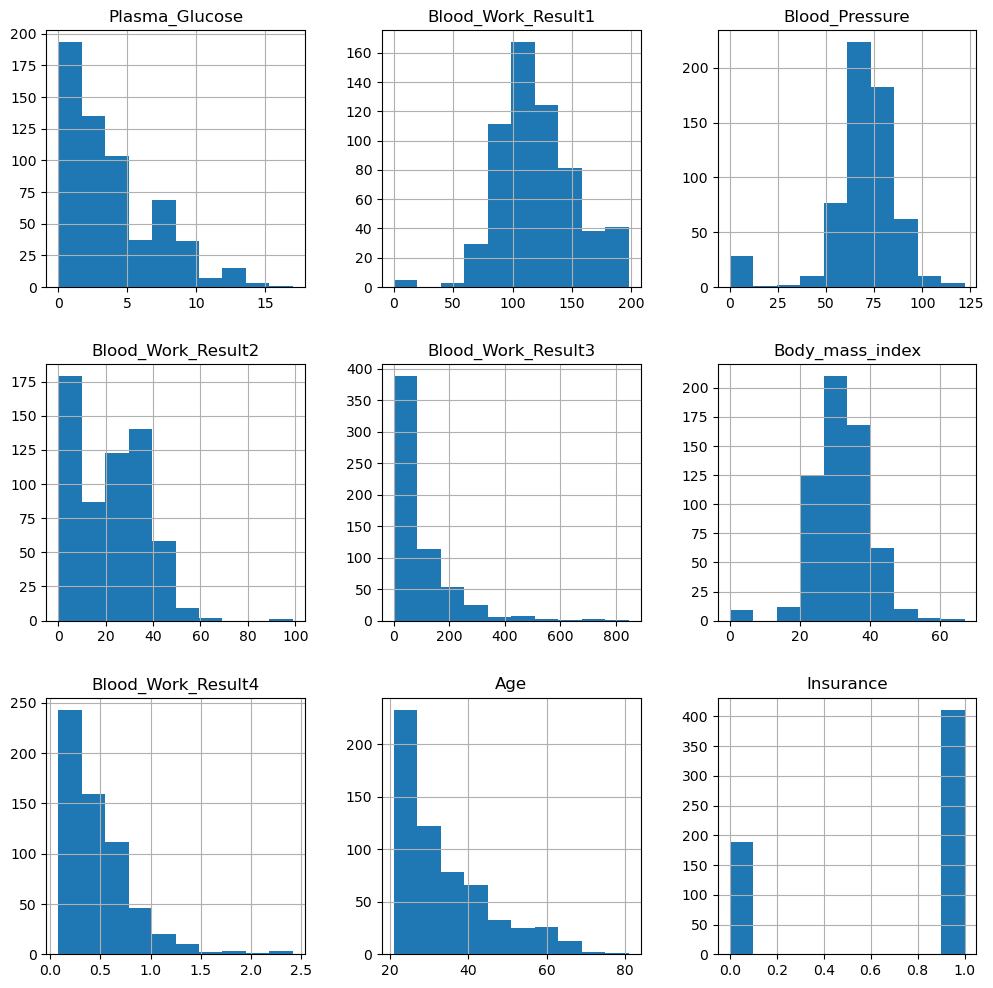

In [57]:
plt.figure()
train_df.hist(figsize=(12, 12))
plt.show()

### Checking for Skewedness

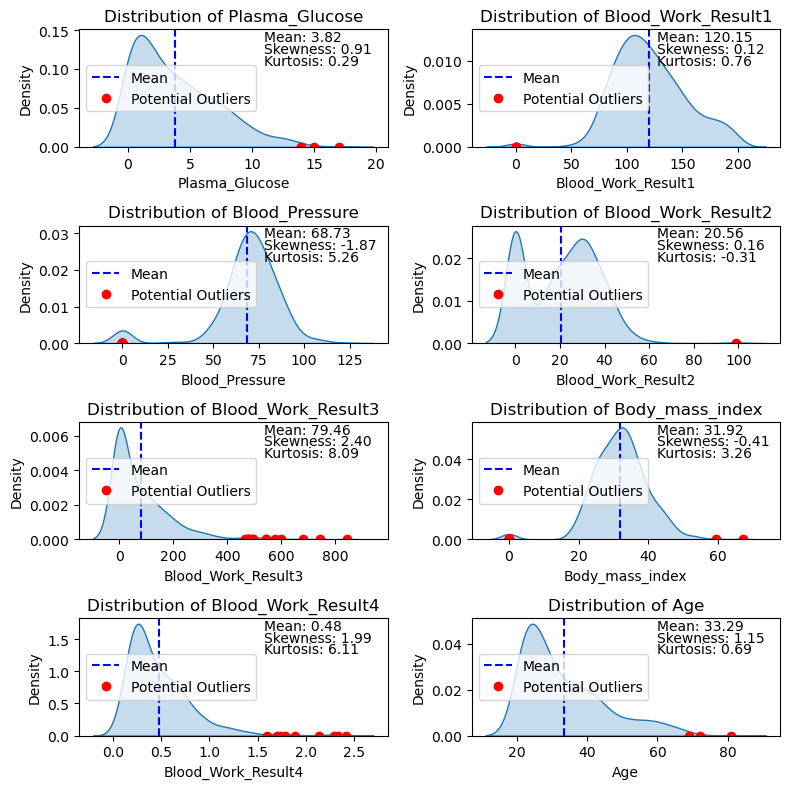

In [47]:
#Visualizing the distribution of the numerical columns using the KDE plot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))  # 2x4 grid

col_names = ['Plasma_Glucose', 'Blood_Work_Result1', 'Blood_Pressure',
       'Blood_Work_Result2', 'Blood_Work_Result3', 'Body_mass_index',
       'Blood_Work_Result4', 'Age']

for i, col in enumerate(col_names):
    row_index = i // 2  # Calculate row index
    col_index = i % 2  # Calculate column index

    sns.kdeplot(data=train_df, x=col, ax=axes[row_index, col_index], fill=True)
    axes[row_index, col_index].set_title(f'Distribution of {col}')
    axes[row_index, col_index].set_xlabel(col)
    axes[row_index, col_index].set_ylabel('Density')

    mean_val = train_df[col].mean()
    skewness_val = train_df[col].skew()
    kurtosis_val = train_df[col].kurtosis()

    axes[row_index, col_index].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[row_index, col_index].transAxes)
    axes[row_index, col_index].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[row_index, col_index].transAxes)
    axes[row_index, col_index].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[row_index, col_index].transAxes)

    axes[row_index, col_index].axvline(mean_val, color='blue', linestyle='--', label='Mean')

    outliers = train_df[(train_df[col] > mean_val + 3 * train_df[col].std()) | (train_df[col] < mean_val - 3 * train_df[col].std())]
    axes[row_index, col_index].plot(outliers[col], [0] * len(outliers), 'ro', label='Potential Outliers')

    axes[row_index, col_index].legend(loc = "center left")

plt.tight_layout()
plt.show()

The feature distributions can be described as follows:
- Exhibiting a right-skew: Plasma glucose, Blood Work Result-2, Blood Work Result-3, Blood Work Result-4, Age.
- Following a normal distribution: Blood Work Result-1, Blood Pressure, Body mass index.

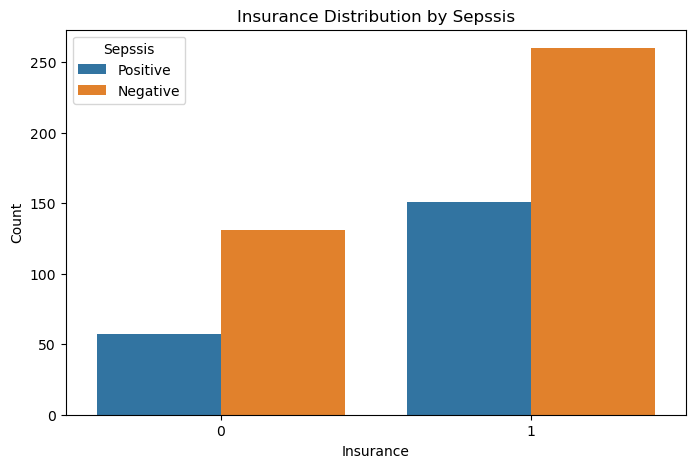

In [53]:
# Categorical Variables - Bar plots
categorical_vars = ['Insurance']
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_df, x=var, hue='Sepssis', palette=None)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'{var} Distribution by Sepssis')
    plt.show()

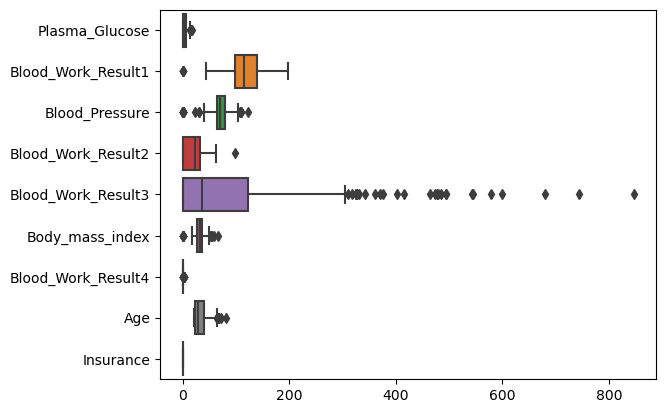

In [49]:
# Boxplot to see the outlier of each numerical column
sns.boxplot(data=train_df, orient="h");

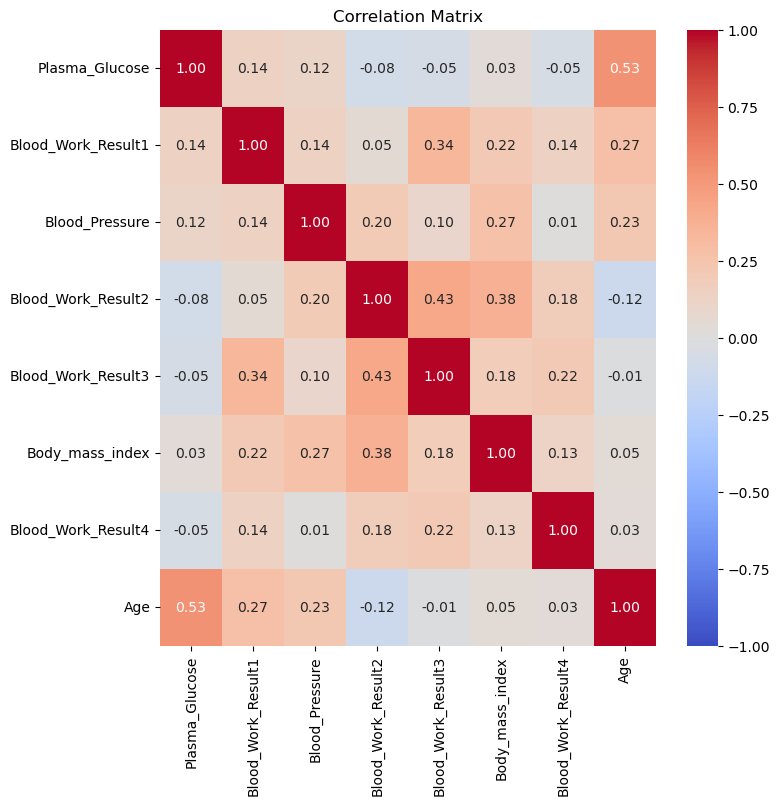

In [50]:
# Visualizing the correlation between the  numerical features
corr_matrix = train_df.iloc[:,:-2].corr()

#Generating heatmap for the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [52]:

fig_1 = px.pie(train_df, names='Sepssis', title='Plot of Ratio of the Label Variables (Sepsis)')
fig_1.show()